# EDA 및 전처리

## 침수흔적도 데이터

침수흔적도 데이터
- 관측된 침수 재해이름, 조사년도 및 침수년도 등 다양한 정보들 있음
- 침수면적 데이터를 자치구 전반의 면적과의 비율을 통하여 산정

In [4]:
# 필요한 라이브러리 설치
!pip install shapely


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium
import pysal

In [4]:
from shapely.geometry import Point

In [5]:
# 사용자 운영체제 확인
import os
os.name

'nt'

In [6]:
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

침수흔적도 칼럼의 정의

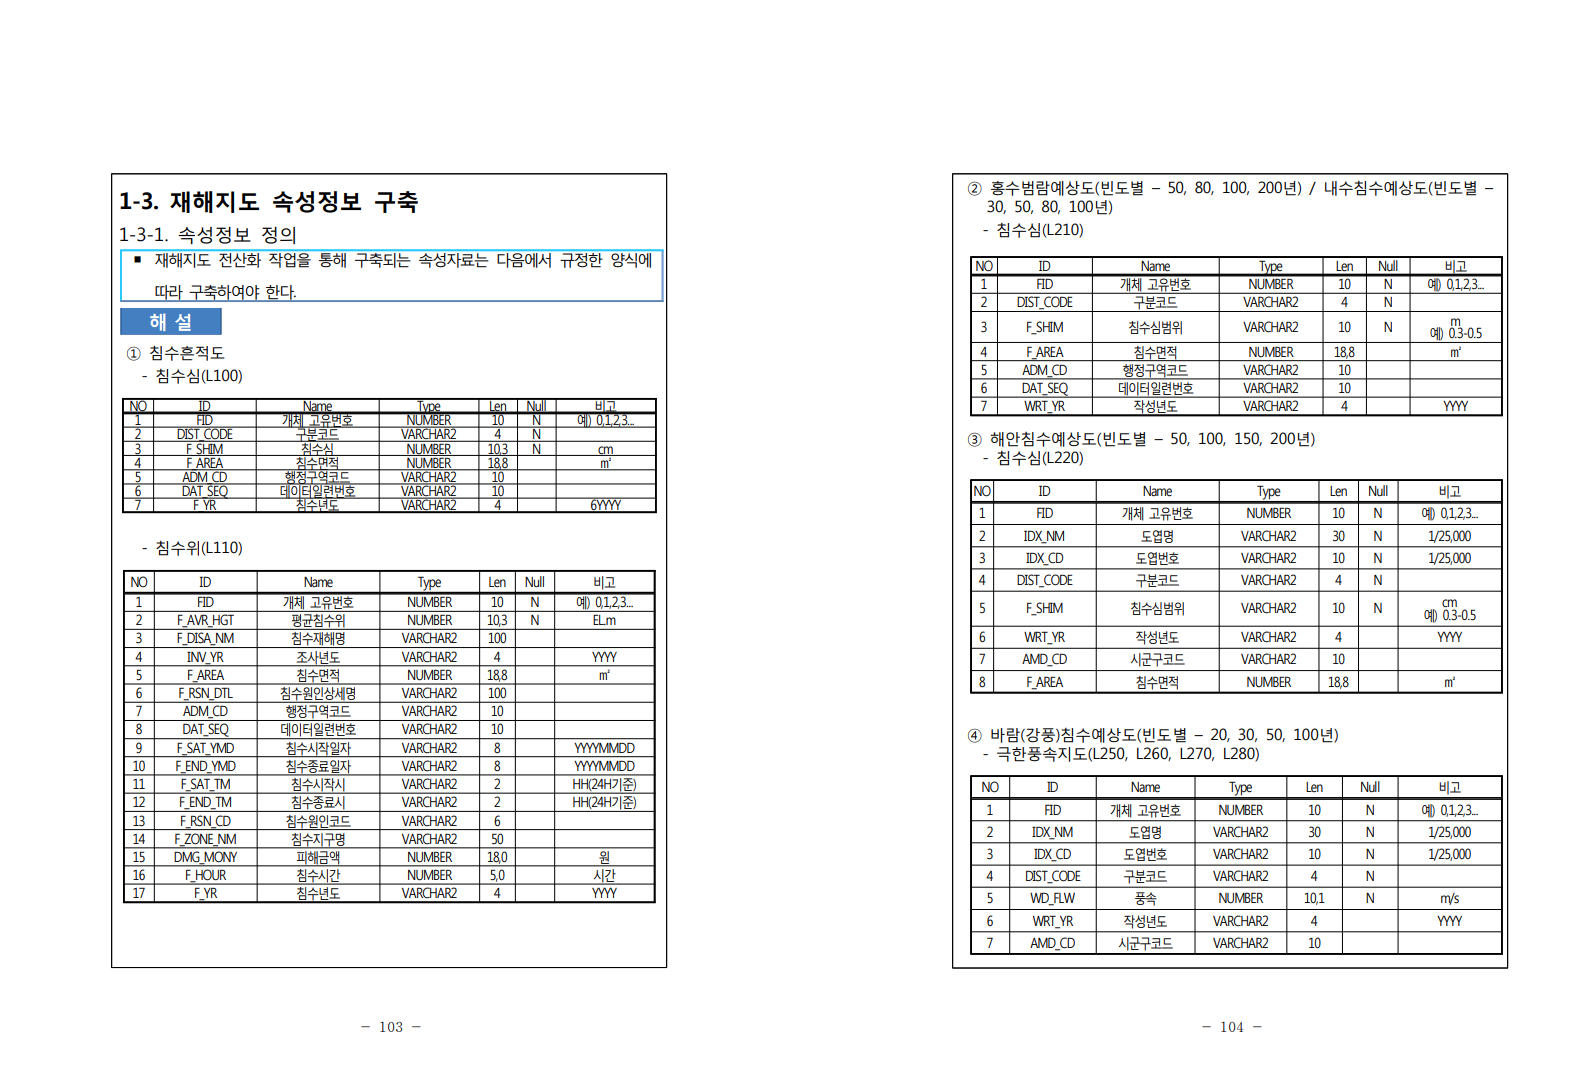{width="200"}

### 2020년 침수피해흔적도

In [7]:
#  2020년 침수피해 흔적도 데이터
dpath = 'C:/Users/yurry/Documents/대학/서울시빅데이터캠퍼스(2023)/호우취약지역입지선정/data/'

In [8]:
seoul20 = gpd.read_file(dpath + "2020년 서울특별시 침수흔적도/서울시_2020.shp")
seoul20.head(3)

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry
0,2018년 8.26~9.1 호우,83.74,143.61,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동258-470,2020,2020,강북구,0.45,"POLYGON ((958787.988 1958336.505, 958803.997 1..."
1,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1..."
2,2018년 8.26~9.1 호우,36.13,61.62,1130510100,20180826,20180901,14,18,침수(기타),강북구 미아동49-142,2020,2020,강북구,0.45,"POLYGON ((958983.095 1957102.275, 958989.841 1..."


In [9]:
# 결측치 확인 및 데이터 전반적인 정보 확인(166개의 기록)
seoul20.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   F_DISA_NM  166 non-null    object  
 1   F_AVR_HGT  166 non-null    float64 
 2   F_AREA     166 non-null    float64 
 3   ADM_CD     166 non-null    object  
 4   F_SAT_YMD  166 non-null    object  
 5   F_END_YMD  166 non-null    object  
 6   F_SAT_TM   166 non-null    object  
 7   F_END_TM   166 non-null    object  
 8   F_RSN_DTL  166 non-null    object  
 9   F_ZONE_NM  166 non-null    object  
 10  INV_YR     166 non-null    object  
 11  F_YR       166 non-null    object  
 12  GU_NAM     166 non-null    object  
 13  F_SHIM     166 non-null    float64 
 14  geometry   166 non-null    geometry
dtypes: float64(3), geometry(1), object(11)
memory usage: 19.6+ KB


In [10]:
# 2018년 침수재해 기록 삭제(이상치 처리 - 데이터 전처리)
seoul20['F_DISA_NM'].unique()
idx=seoul20[seoul20['F_DISA_NM']=='2018년 8.26~9.1 호우'].index
seoul20.drop(idx,inplace=True)

In [11]:
print(seoul20['F_DISA_NM'].unique()) #20년도 데이터만 있음을 확인
print(seoul20.info()) # 162개의 데이터 확인

['2020년 7.28~8.11 호우' '2020년 8.14 호우' '2020년 8.22~8.31 호우'
 '2020년 8.14~ 호우']
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 162 entries, 1 to 165
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   F_DISA_NM  162 non-null    object  
 1   F_AVR_HGT  162 non-null    float64 
 2   F_AREA     162 non-null    float64 
 3   ADM_CD     162 non-null    object  
 4   F_SAT_YMD  162 non-null    object  
 5   F_END_YMD  162 non-null    object  
 6   F_SAT_TM   162 non-null    object  
 7   F_END_TM   162 non-null    object  
 8   F_RSN_DTL  162 non-null    object  
 9   F_ZONE_NM  162 non-null    object  
 10  INV_YR     162 non-null    object  
 11  F_YR       162 non-null    object  
 12  GU_NAM     162 non-null    object  
 13  F_SHIM     162 non-null    float64 
 14  geometry   162 non-null    geometry
dtypes: float64(3), geometry(1), object(11)
memory usage: 20.2+ KB
None


In [12]:
seoul20['GU_NAM'].unique()

array(['강북구', '노원구', '도봉구', '동대문', '마포구', '서대문', '성북구', '종로구', '강동구',
       '강서구', '동작구', '서초구'], dtype=object)

### 2022년도 침수피해흔적도

In [13]:
# 2022년도 침수피해흔적도 데이터 불러오기

seoul22 = gpd.read_file(dpath + '2022년 침수흔적도_230717수정/서울시_2022.shp')
seoul22.head(2)

,OBJECTID,GU_NAM,F_SHIM,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,TYPE,geometry
0,275,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,2022,주택,"POLYGON ((956425.127 1963792.044, 956424.885 1..."
1,223,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,2022,주택,"POLYGON ((956590.641 1963700.111, 956574.753 1..."


In [14]:
# 결측치 확인 및 데이터 전반적인 정보 확인(8668개의 기록)
seoul22.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   4979 non-null   object  
 1   GU_NAM     8668 non-null   object  
 2   F_SHIM     8668 non-null   float64 
 3   F_DISA_NM  8668 non-null   object  
 4   F_AVR_HGT  8668 non-null   float64 
 5   F_AREA     8668 non-null   float64 
 6   ADM_CD     8668 non-null   object  
 7   F_SAT_YMD  8668 non-null   object  
 8   F_END_YMD  8668 non-null   object  
 9   F_SAT_TM   8668 non-null   object  
 10  F_END_TM   8668 non-null   object  
 11  F_RSN_DTL  8668 non-null   object  
 12  F_ZONE_NM  8668 non-null   object  
 13  INV_YR     8668 non-null   object  
 14  F_YR       8668 non-null   object  
 15  TYPE       8668 non-null   object  
 16  geometry   8668 non-null   geometry
dtypes: float64(3), geometry(1), object(13)
memory usage: 1.1+ MB


In [15]:
# dataframe 병합을 위하여 맞지 않는 데이터 칼럼 삭제
seoul22.drop(['OBJECTID'], axis=1, inplace=True)
seoul22.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GU_NAM     8668 non-null   object  
 1   F_SHIM     8668 non-null   float64 
 2   F_DISA_NM  8668 non-null   object  
 3   F_AVR_HGT  8668 non-null   float64 
 4   F_AREA     8668 non-null   float64 
 5   ADM_CD     8668 non-null   object  
 6   F_SAT_YMD  8668 non-null   object  
 7   F_END_YMD  8668 non-null   object  
 8   F_SAT_TM   8668 non-null   object  
 9   F_END_TM   8668 non-null   object  
 10  F_RSN_DTL  8668 non-null   object  
 11  F_ZONE_NM  8668 non-null   object  
 12  INV_YR     8668 non-null   object  
 13  F_YR       8668 non-null   object  
 14  TYPE       8668 non-null   object  
 15  geometry   8668 non-null   geometry
dtypes: float64(3), geometry(1), object(12)
memory usage: 1.1+ MB


In [16]:
#2022년 이외의 데이터 확인
seoul22['F_DISA_NM'].unique() # 제대로 기록되어있음을 확인 가능

array(['2022년 8.8 ~17. 호우', '2022년 9.3~7. 제11호 태풍 힌남노',
       '2022년 6.28~7.1호우', '2022년 8월 집중호우'], dtype=object)

### 2022년 데이터와 2020년 데이터를 한 번에 병합

In [17]:
#2022년과 2020년 하나의 데이터 프레임으로 병합
df= pd.DataFrame(seoul20.append(seoul22, ignore_index=True))
df.head(2)

C:\Users\yurry\AppData\Local\Temp\ipykernel_26412\1137356188.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= pd.DataFrame(seoul20.append(seoul22, ignore_index=True))


,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry,TYPE
0,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1...",NaN
1,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1...",NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830 entries, 0 to 8829
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   F_DISA_NM  8830 non-null   object  
 1   F_AVR_HGT  8830 non-null   float64 
 2   F_AREA     8830 non-null   float64 
 3   ADM_CD     8830 non-null   object  
 4   F_SAT_YMD  8830 non-null   object  
 5   F_END_YMD  8830 non-null   object  
 6   F_SAT_TM   8830 non-null   object  
 7   F_END_TM   8830 non-null   object  
 8   F_RSN_DTL  8830 non-null   object  
 9   F_ZONE_NM  8830 non-null   object  
 10  INV_YR     8830 non-null   object  
 11  F_YR       8830 non-null   object  
 12  GU_NAM     8830 non-null   object  
 13  F_SHIM     8830 non-null   float64 
 14  geometry   8830 non-null   geometry
 15  TYPE       8668 non-null   object  
dtypes: float64(3), geometry(1), object(12)
memory usage: 1.1+ MB


### 동에 대한 데이터 따로 정리

In [19]:
df_dong = pd.read_csv(dpath +'침수면적비율(동추가).csv')
df_dong = pd.DataFrame(df_dong)
df_dong.head(3)

C:\Users\yurry\AppData\Local\Temp\ipykernel_26412\2459987920.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dong = pd.read_csv(dpath +'침수면적비율(동추가).csv')


,Unnamed: 0,Unnamed: 0_x,OBJECTID,자치구,F_SHIM,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,...,TYPE,geometry,자치구.1,동별(2),면적 (m^2),침수면적비율,Unnamed: 0_y,위도,경도,동 이름
0,0,0,275.0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,...,주택,POLYGON ((956425.1271956386 1963792.0436241413...,강북구,강북구,23600000,0.000164,0,37.672492,127.006527,우이동
1,1,1,223.0,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,...,주택,POLYGON ((956590.6408143371 1963700.1113435405...,강북구,강북구,23600000,0.000093,1,37.671688,127.007329,우이동
2,2,2,246.0,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,...,주택,POLYGON ((956383.2795007367 1963392.8632350476...,강북구,강북구,23600000,0.001919,2,37.667859,127.006037,우이동


In [20]:
df['동이름'] = df_dong['동 이름']
df.head(3)

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry,TYPE,동이름
0,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1...",NaN,우이동
1,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1...",NaN,우이동
2,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1...",NaN,우이동


## 자치구 별 면적 데이터

자치구 별 면적 데이터
- 서울특별시 자치구마다의 전체 면적 기입
- 해당 자치구 면적들을 기준으로 면적비율 칼럼 작성

In [21]:
import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    areadata = pd.read_excel(dpath + '자치구별면적.xlsx', engine="openpyxl")

In [22]:
areadata.columns = areadata.iloc[0]
areadata.head(4)

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
0,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
1,합계,소계,소계,9667669.0,605.21,15974.0
2,NaN,종로구,소계,152211.0,23.91,6365.0
3,NaN,NaN,사직동,9355.0,1.23,7606.0


In [23]:
gu_idx = areadata[areadata['동별(3)']== '소계'].index
areadata.drop(gu_idx, axis=0, inplace=True)
areadata.head(4)

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
0,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
3,NaN,NaN,사직동,9355.0,1.23,7606.0
4,NaN,NaN,삼청동,2642.0,1.49,1773.0
5,NaN,NaN,부암동,9536.0,2.27,4201.0


In [24]:
# 첫번재 행을 지우기
areadata.drop([0], axis=0, inplace = True)
areadata.head(4)

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
3,NaN,NaN,사직동,9355.0,1.23,7606.0
4,NaN,NaN,삼청동,2642.0,1.49,1773.0
5,NaN,NaN,부암동,9536.0,2.27,4201.0
6,NaN,NaN,평창동,17858.0,8.87,2013.0


In [25]:
# 필요없는 칼럼 삭제 및 인덱스 초기화
total = areadata.copy()
total.drop(['동별(1)', '동별(2)', '인구 (명)', '인구밀도 (명/㎢)'], axis=1, inplace=True)
total.reset_index(drop=True)
total.head(4)

,동별(3),면적 (㎢)
3,사직동,1.23
4,삼청동,1.49
5,부암동,2.27
6,평창동,8.87


In [26]:
# 동면적을 침수면적과 동일한 단위로 변형
total['면적 (m^2)'] = total['면적 (㎢)']*1000000
total.head(4)

,동별(3),면적 (㎢),면적 (m^2)
3,사직동,1.23,1230000.0
4,삼청동,1.49,1490000.0
5,부암동,2.27,2270000.0
6,평창동,8.87,8870000.0


In [27]:
total.index = total['동별(3)']
total.head(4)

,동별(3),면적 (㎢),면적 (m^2)
동별(3),,,
사직동,사직동,1.23,1230000.0
삼청동,삼청동,1.49,1490000.0
부암동,부암동,2.27,2270000.0
평창동,평창동,8.87,8870000.0


In [28]:
total.drop(['면적 (㎢)'], axis=1, inplace=True)
total.head(4)

,동별(3),면적 (m^2)
동별(3),,
사직동,사직동,1230000.0
삼청동,삼청동,1490000.0
부암동,부암동,2270000.0
평창동,평창동,8870000.0


In [29]:
total.rename(columns={'동별(3)':'동이름'}, inplace=True)
total.head(3)

,동이름,면적 (m^2)
동별(3),,
사직동,사직동,1230000.0
삼청동,삼청동,1490000.0
부암동,부암동,2270000.0


In [31]:
df = pd.merge(df, total, on = '동이름')
df.head(3)

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry,TYPE,동이름,면적 (m^2)
0,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1...",NaN,우이동,10280000.0
1,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1...",NaN,우이동,10280000.0
2,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1...",NaN,우이동,10280000.0


In [32]:
df['침수면적비율'] = df['F_AREA']/df['면적 (m^2)']
df.head(3)

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,INV_YR,F_YR,GU_NAM,F_SHIM,geometry,TYPE,동이름,면적 (m^2),침수면적비율
0,2020년 7.28~8.11 호우,93.16,126.65,1130510100,20200728,20200811,14,18,침수,강북구 미아동258-115,2020,2020,강북구,0.45,"POLYGON ((958768.098 1958489.783, 958781.967 1...",NaN,우이동,10280000.0,0.000012
1,2020년 7.28~8.11 호우,31.34,106.21,1130510100,20200728,20200811,14,18,침수,강북구 미아동49-97,2020,2020,강북구,0.45,"POLYGON ((958913.415 1957059.035, 958902.665 1...",NaN,우이동,10280000.0,0.00001
2,2020년 7.28~8.11 호우,58.39,82.00,1135010500,20200728,20200811,16,22,기타,노원구 상계동68-24,2020,2020,노원구,0.50,"POLYGON ((963183.303 1963425.726, 963173.013 1...",NaN,우이동,10280000.0,0.000008


In [145]:
# 엑셀 파일로 저장
df.to_excel('2020년 침수면적비율(new).xlsx', engine='xlsxwriter')

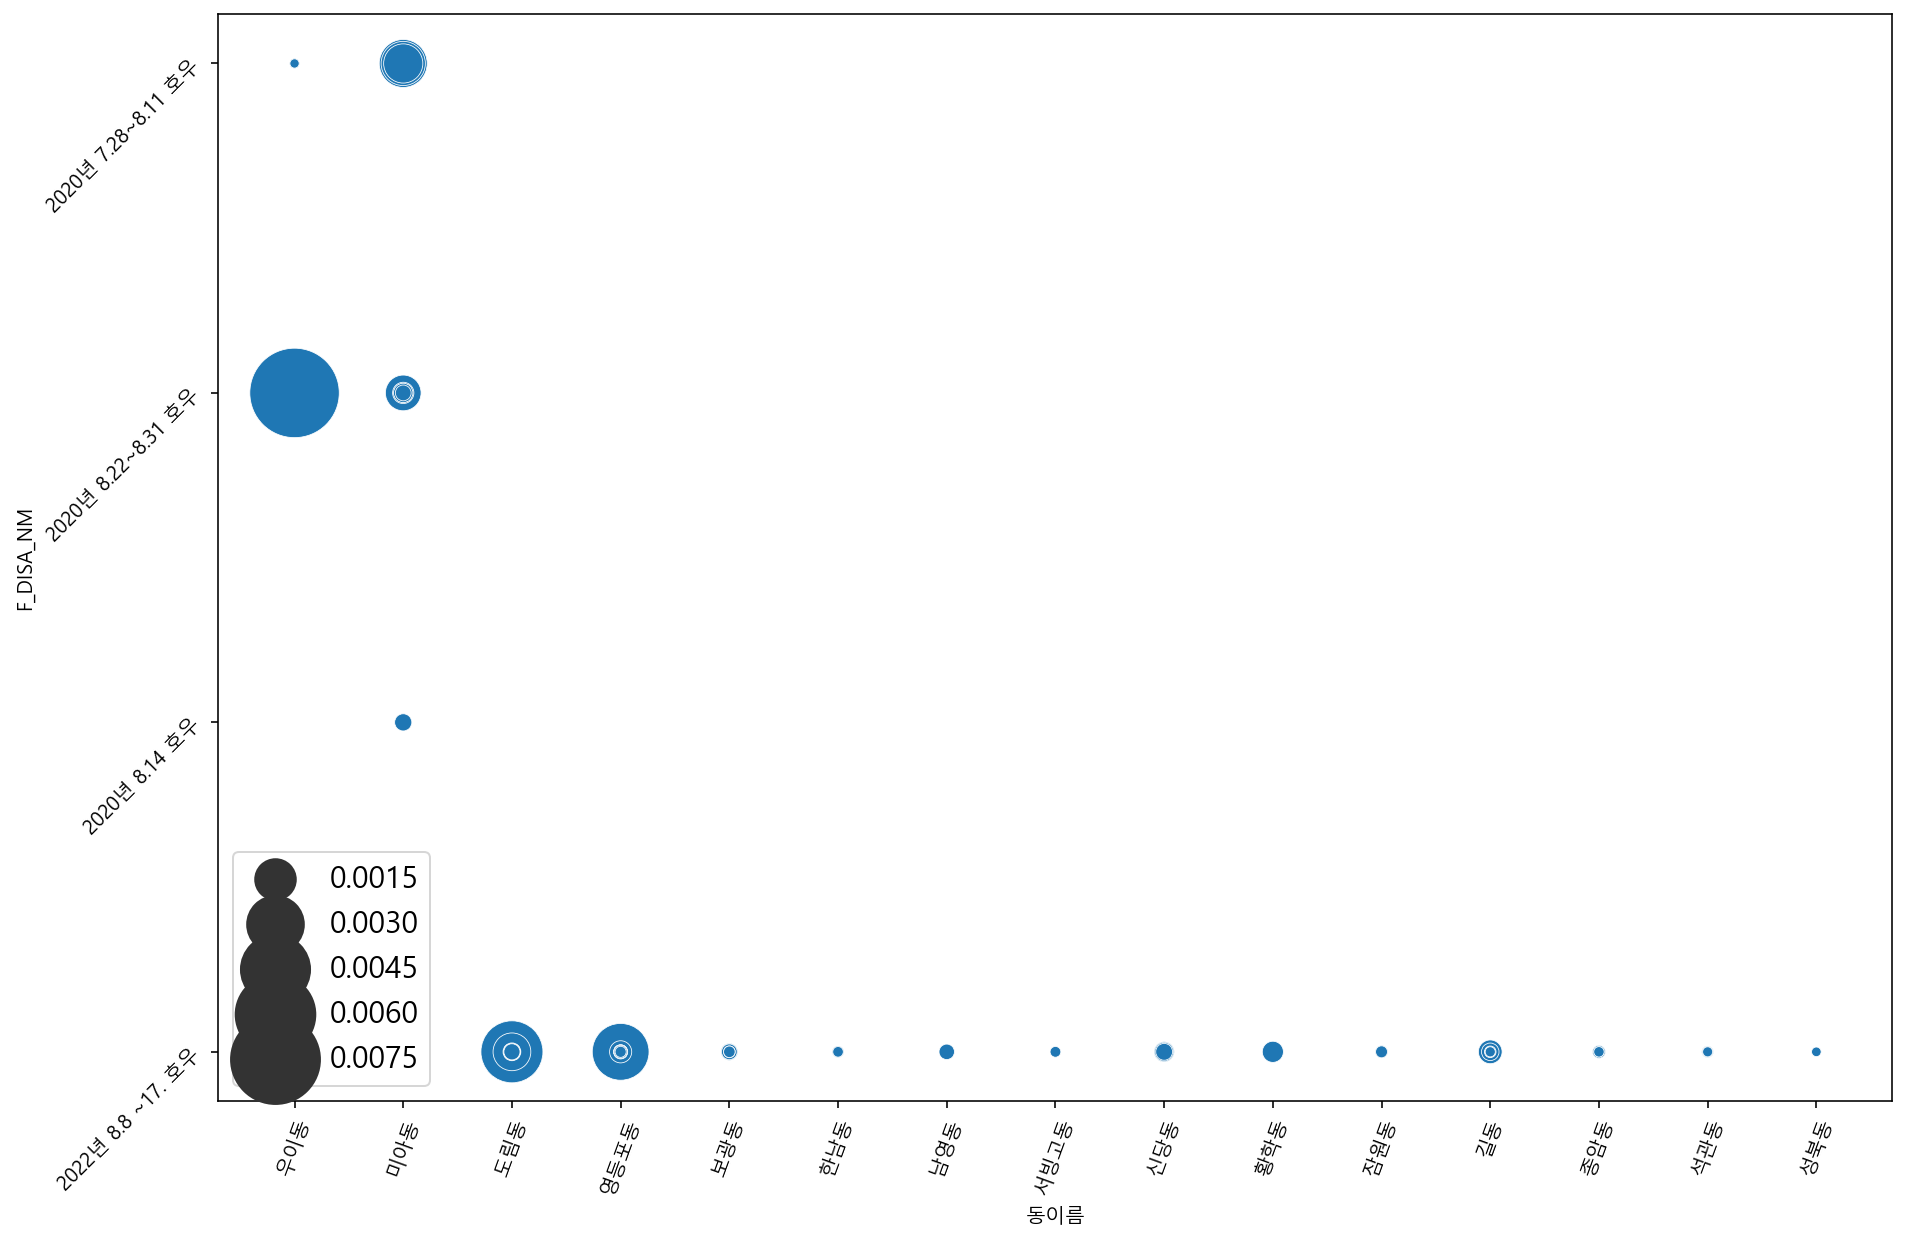

In [33]:
# 자치구별 일어났던 호우에 대한 침수피해면적에 대한 비율
# 2022년 8.8~17의 호우가 큰 영향을 미침을 확인 가능
# 강북구, 도봉구, 강동구, 동작구, 서초구, 영등포구, 성동구, 금천구, 관악구 등에 주목을 해야함을 확인 가능

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [15,10]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="동이름", y="F_DISA_NM", size="침수면적비율", legend=True, sizes=(20, 2000), cmap='viridis')

# show the graph
plt.yticks(rotation=45)
plt.xticks(rotation=70)
plt.legend(fontsize = 15, loc = 'lower left')
plt.show()

In [39]:
# 서울특별시 경계데이터 불러오기 + shp 형식이용
border = gpd.read_file(dpath + 'LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shp')
seoul20_shp = gpd.read_file(dpath + "2020년 서울특별시 침수흔적도/서울시_2020.shp")
seoul22_shp = gpd.read_file(dpath + '2022년 침수흔적도_230717수정/서울시_2022.shp')

<AxesSubplot:>

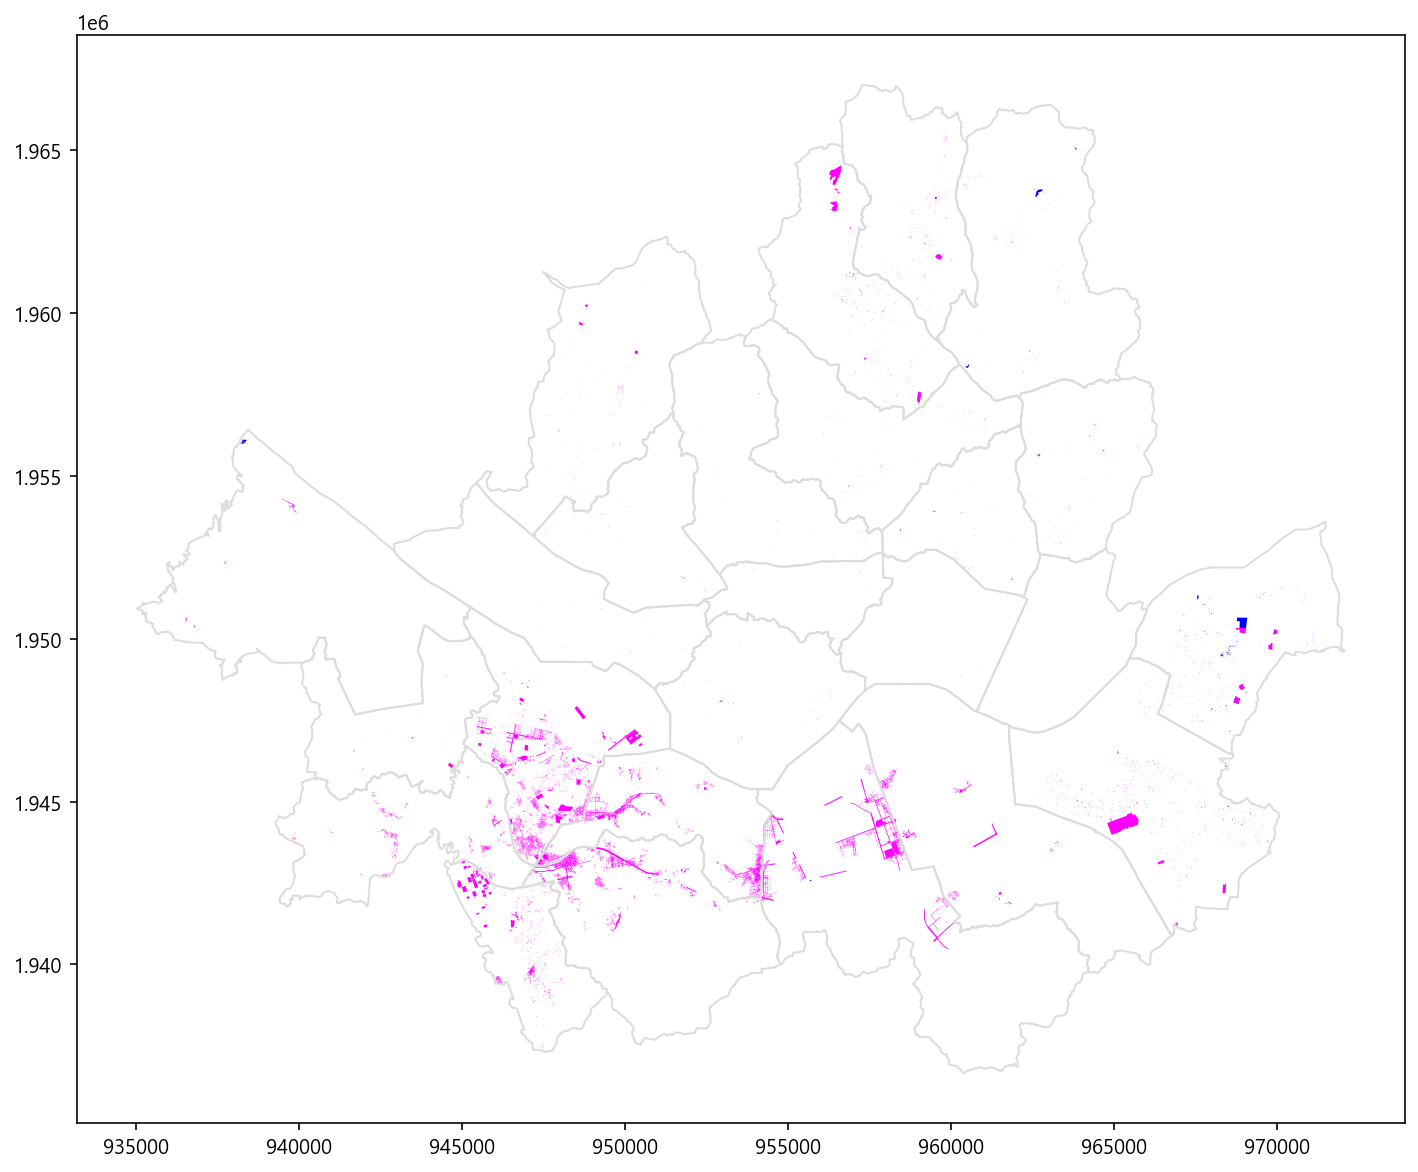

In [41]:
# 침수 지역에 대한 시각화 확인

fig, ax = plt.subplots(figsize=(20, 10))
border.plot(ax=ax, color = 'none', edgecolor = 'gainsboro', zorder=3)
seoul20_shp.plot(ax=ax, color='blue')
seoul22_shp.plot(ax=ax, color='magenta')

자치구 자체로만 확인하였을 때에는 한강 아래 지역들에 대하여 주의해야함을 확인 가능
-> 특히 영등포구, 동작구, 관악구, 금천구, 구로구, 송파구(일부), 서초구, 강동구( 일부) 확인 가능
-> 여기서 한강아래의 남서부지역의 특징을 확인해야함을 느낌

In [23]:
# 엑셀파일로 저장
df.to_excel(excel_writer= dpath + '자치구 별 침수면적비율(2020 및 2022).xlsx')

## 고도 데이터

고도지표 데이터
- 서울특별시 전체 각각의 구마다의 고도 데이터 작성
- x축(위치), y축(위치), z축(고도)
- z축을 중심으로 확인 가능

In [42]:
dpath2 = 'C:/Users/yurry/Documents/대학/서울시빅데이터캠퍼스(2023)/호우취약지역입지선정/data/서울특별시/2014 서울특별시[ascii]/'

In [43]:
# OS를 통해 폴더 열기
import os
files = os.listdir('C:/Users/yurry/Documents/대학/서울시빅데이터캠퍼스(2023)/호우취약지역입지선정/data/서울특별시/2014 서울특별시[ascii]')
files

['서울특별시 강남구.txt',
 '서울특별시 강동구.txt',
 '서울특별시 강북구.txt',
 '서울특별시 강서구.txt',
 '서울특별시 관악구.txt',
 '서울특별시 광진구.txt',
 '서울특별시 구로구.txt',
 '서울특별시 금천구.txt',
 '서울특별시 노원구.txt',
 '서울특별시 도봉구.txt',
 '서울특별시 동대문구.txt',
 '서울특별시 동작구.txt',
 '서울특별시 마포구.txt',
 '서울특별시 서대문구.txt',
 '서울특별시 서초구.txt',
 '서울특별시 성동구.txt',
 '서울특별시 성북구.txt',
 '서울특별시 송파구.txt',
 '서울특별시 양천구.txt',
 '서울특별시 영등포구.txt',
 '서울특별시 용산구.txt',
 '서울특별시 은평구.txt',
 '서울특별시 종로구.txt',
 '서울특별시 중구.txt',
 '서울특별시 중랑구.txt']

In [45]:
godo_path ='C:/Users/yurry/Documents/대학/서울시빅데이터캠퍼스(2023)/호우취약지역입지선정/data/서울특별시/2014 서울특별시[ascii]'

In [46]:
godo = pd.DataFrame()
for i in files:
    g_data = pd.read_table( godo_path + f'/{i}',  skiprows=2, delim_whitespace=True, names=['x','y','z'])
    godo = pd.concat([godo, g_data])
    
godo = godo.reset_index(drop = True)

In [47]:
# 고도데이터를 2차원의 (POINT) shp형식으로 저장
godo_2d = gpd.GeoDataFrame(godo, geometry=gpd.points_from_xy(godo.x, godo.y))
godo_2d.head(3) #ESPG:51

,x,y,z,geometry
0,200305.31,547279.91,5.69,POINT (200305.310 547279.910)
1,200305.31,547189.91,5.38,POINT (200305.310 547189.910)
2,200395.31,547549.91,19.62,POINT (200395.310 547549.910)


In [ ]:
# point를 polygon geometry로 변환하기

def bike_fence_format(s):
    s = s.replace('[', '').replace(']', '').split(',')
    s = [float(x) for x in s]

    return s

In [ ]:
df['FENCE_LOC'] = df['FENCE_LOC'].apply(bike_fence_format)


df['LAT'] = df['FENCE_LOC'].apply(lambda x: x[1::2])
df['LON'] = df['FENCE_LOC'].apply(lambda x: x[::2])
We can use some list comprehensions to build a list of Shapely polygons.

geom_list = [(x, y) for x, y  in zip(df['LON'],df['LAT'])]

geom_list_2 = [Polygon(tuple(zip(x, y))) for x, y in geom_list]
Finally, we can create a gdf using our list of Shapely polygons.

polygon_gdf =  gpd.GeoDataFrame(geometry=geom_list_2)

In [48]:
# 고도데이터를 3차원의 (Z POINT) shp형식으로 저장
godo_3d = gpd.GeoDataFrame(godo, geometry=godo.apply(lambda row: Point(row.x,row.y,row.z), axis=1))
godo_3d.head() # 고도데이터 확인 -> geometry 공간정보 POINT Z로 저장되어있음을 확인 가능

,x,y,z,geometry
0,200305.31,547279.91,5.69,POINT Z (200305.310 547279.910 5.690)
1,200305.31,547189.91,5.38,POINT Z (200305.310 547189.910 5.380)
2,200395.31,547549.91,19.62,POINT Z (200395.310 547549.910 19.620)
3,200395.31,547459.91,10.71,POINT Z (200395.310 547459.910 10.710)
4,200395.31,547369.91,5.96,POINT Z (200395.310 547369.910 5.960)


In [49]:
# 서울특별시의 고도 범위에 대하여 출력
godo['z'].describe()

count    111487.000000
mean         64.022506
std          93.905452
min           1.010000
25%          14.650000
50%          27.940000
75%          65.735000
max         795.010000
Name: z, dtype: float64

<AxesSubplot:>

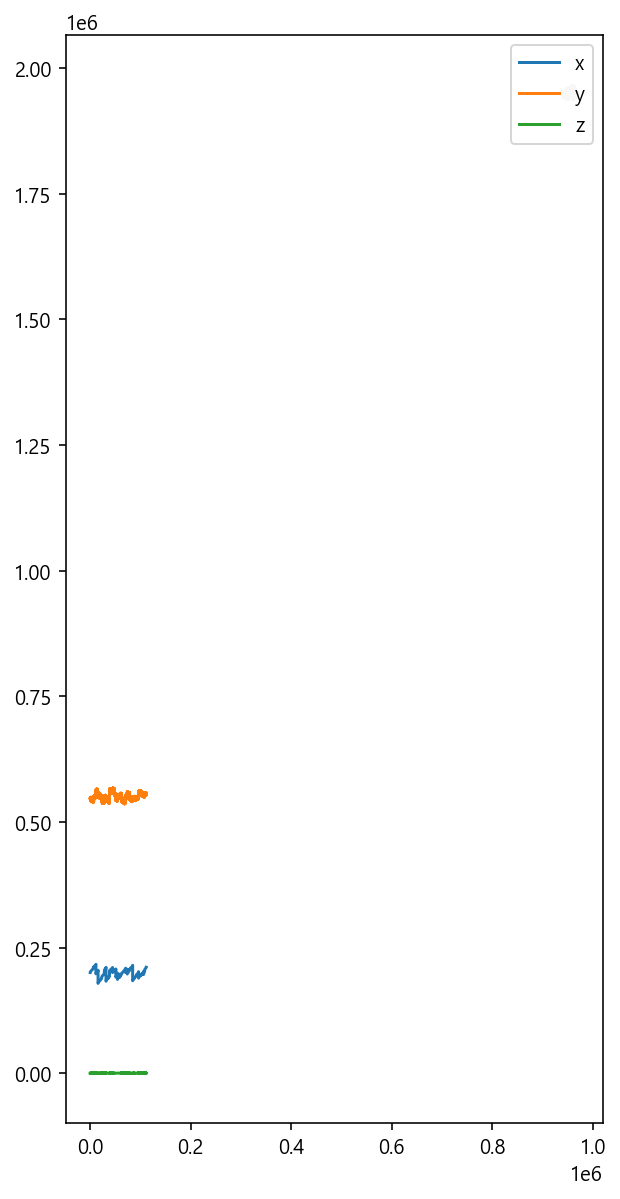

In [50]:
# 고도 데이터 시각화 확인
fig, ax = plt.subplots(figsize=(20, 10))
border.plot(ax=ax, color = 'none', edgecolor = 'gainsboro', zorder=3)
godo.plot(ax=ax)

In [53]:
!pip install geojson


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
# 등고선 geojson file 다운로드

import geojson

with open(dpath + '등고선.geojson', encoding='utf-8') as f:
    gj = geojson.load(f)
features = gj['features'][0]

KeyboardInterrupt: 

## 빗물펌프

빗물펌프의 개수를 카운트함으로써 격자 분석에 이용가능, 기존의 시설위치로 사용

In [111]:
# 빗물펌프 위치 데이터 shape file (geometry 정보 MULTIPOINT로 저장)
rainpump = gpd.read_file( dpath + "RAINPUMP/RAINPUMP.shp")
rainpump.head()

,OBJECTID,RV_CD,SP_CD,UNI_CD,IDX_NO,PUMP_NM,ETC,OPR_YN,EST_DT,geometry
0,6825,1005090,C02,1005090C020000000046,0000000046,b'bdc5c0ccb9ae32',812,NaN,NaN,MULTIPOINT (206013.480 555296.130)
1,6826,1000010,C02,1000010C020000001001,0000001001,b'bfc1bcf6',903,NaN,NaN,MULTIPOINT (201576.620 549085.590)
2,6827,1000010,C02,1000010C020000001002,0000001002,b'b1b8c0c7',1202,NaN,NaN,MULTIPOINT (208184.080 548025.410)
3,6828,1005090,C02,1005090C020000001003,0000001003,b'c0c0bac0',904,NaN,NaN,MULTIPOINT (202961.100 549962.400)
4,6829,1005090,C02,1005090C020000001004,0000001004,b'b6d2bcb6',901,NaN,NaN,MULTIPOINT (203709.310 550156.380)


<AxesSubplot:>

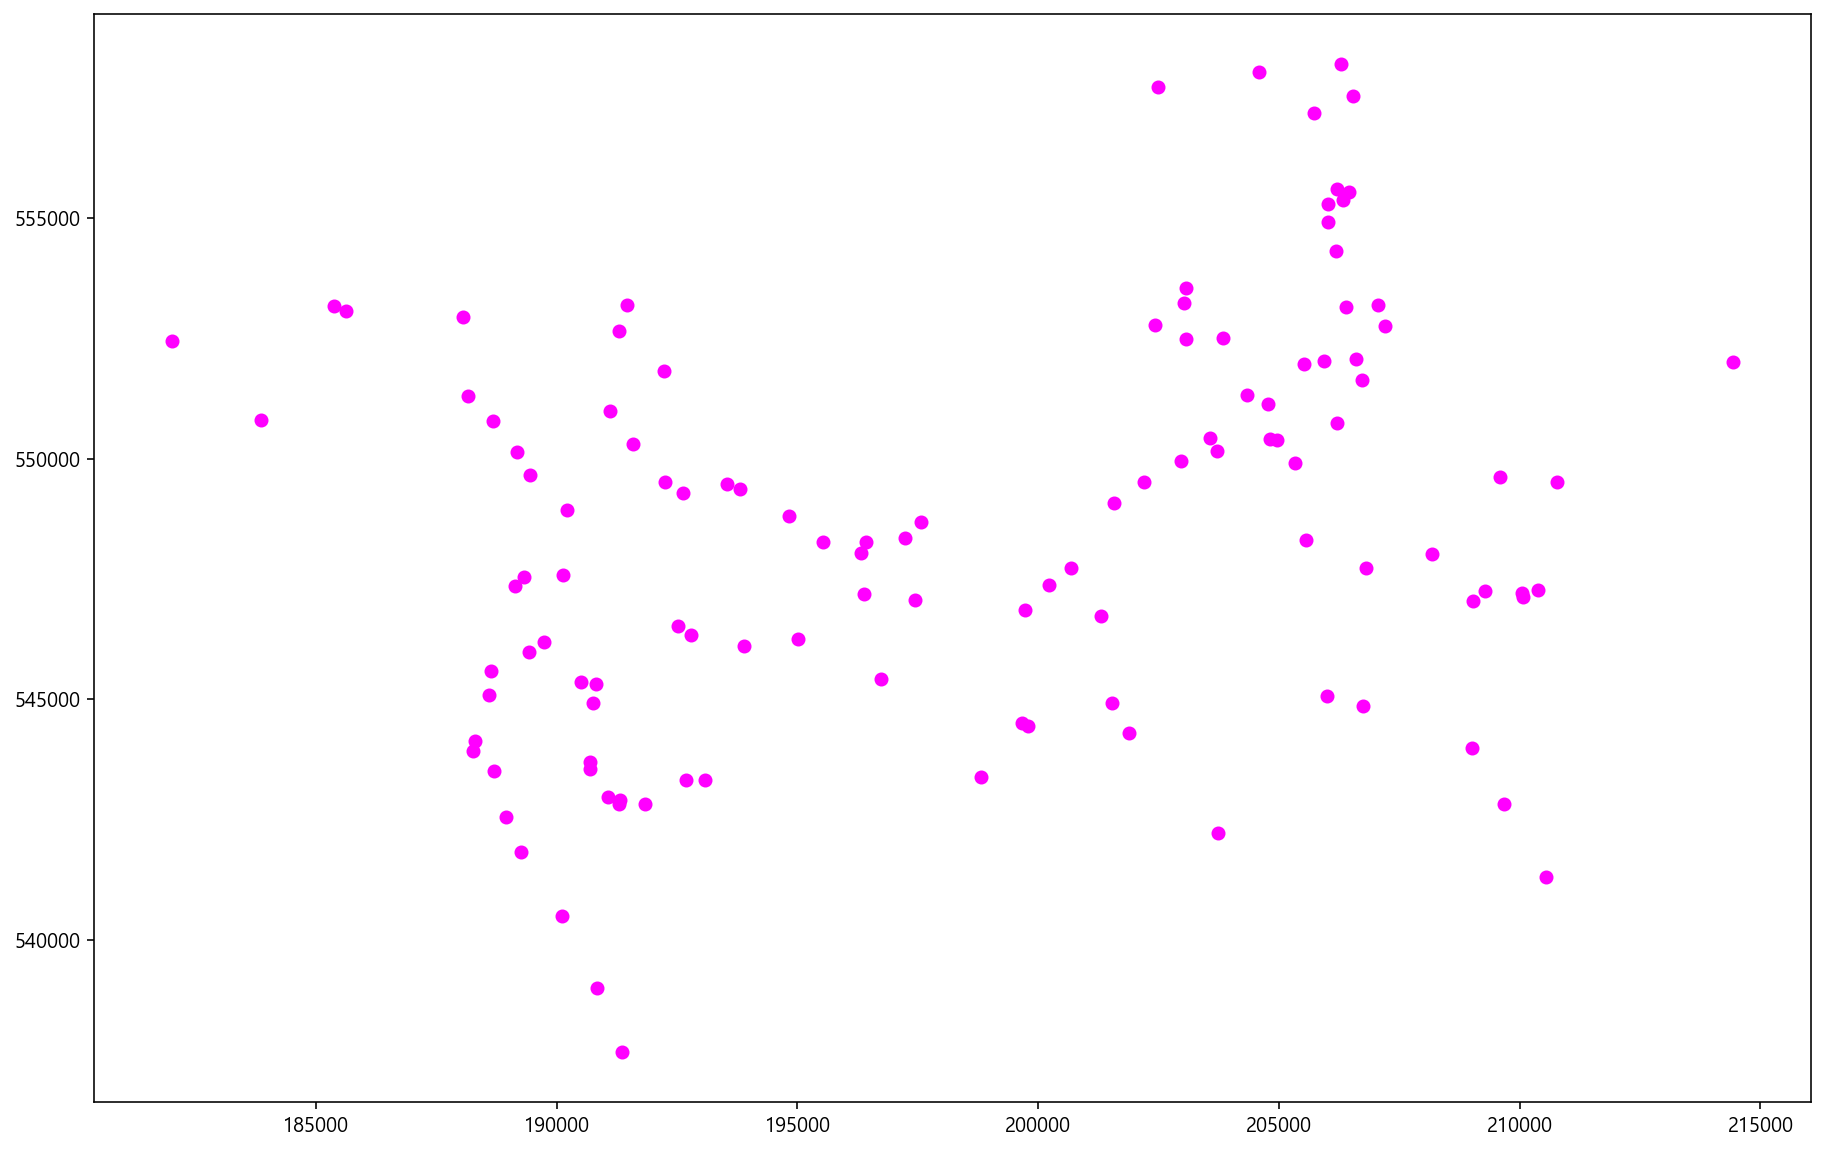

In [114]:
fig, ax = plt.subplots(figsize=(20, 10))
rainpump.plot(ax=ax, color='magenta')

<AxesSubplot:>

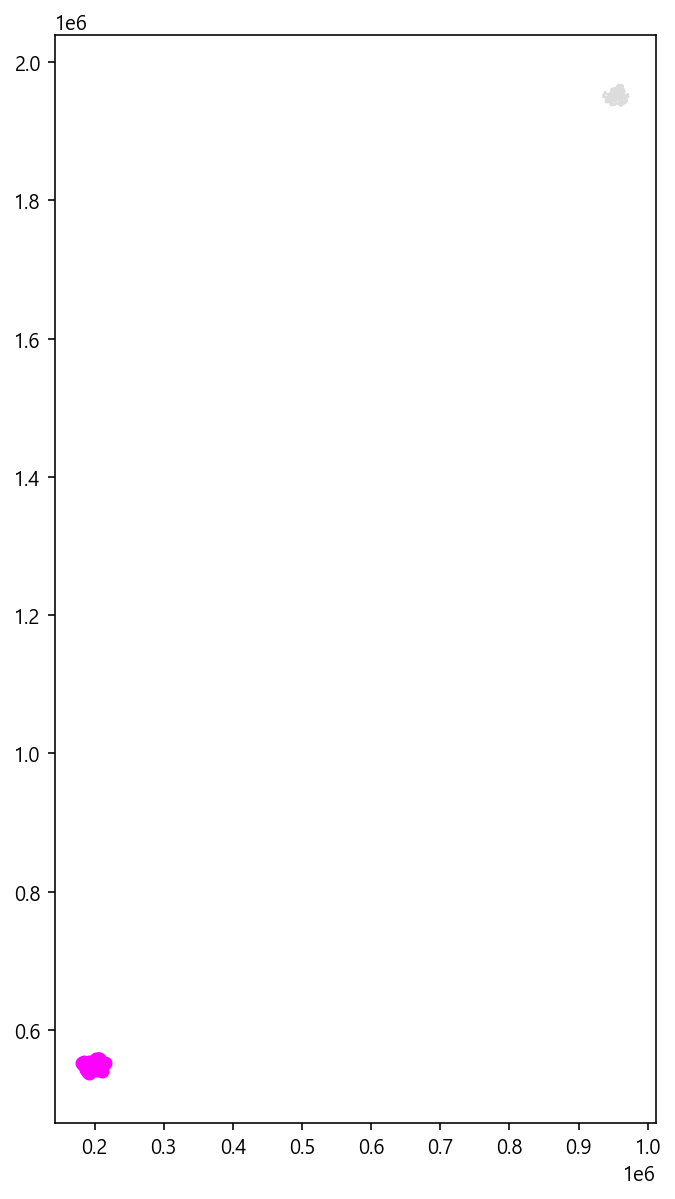

In [117]:
fig, ax = plt.subplots(figsize=(20, 10))
border.plot(ax=ax, color= 'none', edgecolor = 'gainsboro', zorder=3)
rainpump.plot(ax=ax, color='magenta')

In [118]:
border

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,°­µ¿±¸,NaN,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,¼ÛÆÄ±¸,NaN,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,°­³²±¸,NaN,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,¼­ÃÊ±¸,NaN,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,°ü¾Ç±¸,NaN,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
5,11590,µ¿ÀÛ±¸,NaN,11590,130,"POLYGON ((951811.770 1946444.671, 951885.519 1..."
6,11560,¿µµîÆ÷±¸,NaN,11560,131,"POLYGON ((945280.001 1950949.319, 945361.246 1..."
7,11545,±ÝÃµ±¸,NaN,11545,132,"POLYGON ((944705.924 1943086.537, 944706.472 1..."
8,11530,±¸·Î±¸,NaN,11530,133,"POLYGON ((945165.294 1946679.190, 945362.702 1..."
9,11500,°­¼­±¸,NaN,11500,134,"POLYGON ((939006.015 1955916.461, 939036.124 1..."


In [119]:
godo_2d

,x,y,z,geometry
0,200305.31,547279.91,5.69,POINT (200305.310 547279.910)
1,200305.31,547189.91,5.38,POINT (200305.310 547189.910)
2,200395.31,547549.91,19.62,POINT (200395.310 547549.910)
3,200395.31,547459.91,10.71,POINT (200395.310 547459.910)
4,200395.31,547369.91,5.96,POINT (200395.310 547369.910)
...,...,...,...,...
111482,210697.72,554846.65,132.81,POINT (210697.720 554846.650)
111483,210697.72,554756.65,121.28,POINT (210697.720 554756.650)
111484,210697.72,554666.65,113.31,POINT (210697.720 554666.650)
111485,210787.72,555026.65,146.72,POINT (210787.720 555026.650)


## 강우량 데이터

강우량 데이터
- 8월, 9월의 강우량 수치에 대하여만 수집
- 80mm를 집중호우의 기준으로 보고 집중호우를 따로 변수처리 -> 80mm_8월, 80mm_9월 따로 정리

In [56]:
gangwoo = pd.read_excel(dpath + '강우량.xlsx')
gangwoo

,자치구,소계_8월,소계_9월,80mm_8월,80mm_9월
0,강남구,733.333333,293.666667,462.3333,172.8333
1,강동구,613.750000,268.750000,315.5000,170.0000
2,강북구,492.000000,283.000000,220.0000,117.5000
3,강서구,481.750000,197.500000,227.5000,121.5000
4,관악구,722.750000,293.500000,465.7500,150.0000
5,광진구,597.000000,296.500000,313.5000,163.0000
6,구로구,699.000000,223.500000,451.0000,143.0000
7,금천구,694.500000,258.750000,435.7500,141.2500
8,노원구,544.250000,270.250000,266.0000,101.2500
9,도봉구,576.500000,269.500000,377.5000,112.5000


In [57]:
# 시계열 데이터로 변형
df['F_SAT_YMD'] = pd.to_datetime(df['F_SAT_YMD'])
df['F_SAT_YMD'].dt.month

0       7
1       7
2       8
3       8
4       8
       ..
8813    8
8814    8
8815    8
8816    8
8817    8
Name: F_SAT_YMD, Length: 8818, dtype: int64

In [58]:
# 8월 데이터와 9월 데이터로 나누기
df_8 = df[df['F_SAT_YMD'].dt.month == 8] # 8월의 침수피해만 수집
df_9 = df[df['F_SAT_YMD'].dt.month == 9] # 9월의 침수피해만 수집

In [59]:
gangwoo.rename(columns={'자치구':'GU_NAM'}, inplace=True)

In [60]:
# 강우량이 80mm를 넘었을 때와 침수면적비율 상관정도를 확인
df_gang_8 = pd.merge(df_8, gangwoo, on = 'GU_NAM')
df_gang_9 = pd.merge(df_9, gangwoo, on = 'GU_NAM')

In [61]:
df_gang_8.head(3)

,F_DISA_NM,F_AVR_HGT,F_AREA,ADM_CD,F_SAT_YMD,F_END_YMD,F_SAT_TM,F_END_TM,F_RSN_DTL,F_ZONE_NM,...,GU_NAM,F_SHIM,geometry,TYPE,면적 (m^2),침수면적비율,소계_8월,소계_9월,80mm_8월,80mm_9월
0,2020년 7.28~8.11 호우,17.55,36.0,1135010300,2020-08-06,20200811,17,24,침수,노원구 공릉동571-5,...,노원구,0.5,"POLYGON ((962230.655 1958185.093, 962240.735 1...",NaN,35440000.0,0.000001,544.25,270.25,266.0,101.25
1,2020년 7.28~8.11 호우,18.68,66.0,1135010300,2020-08-04,20200811,16,24,침수,노원구 공릉동383-13,...,노원구,0.5,"POLYGON ((962242.427 1958563.050, 962250.447 1...",NaN,35440000.0,0.000002,544.25,270.25,266.0,101.25
2,2020년 7.28~8.11 호우,29.02,68.0,1135010300,2020-08-06,20200811,12,24,침수,노원구 공릉동503-19,...,노원구,0.5,"POLYGON ((962607.857 1958554.909, 962621.651 1...",NaN,35440000.0,0.000002,544.25,270.25,266.0,101.25


In [62]:
# 분산분석을 통해 상관성을 확인

from statsmodels.formula.api import ols
import statsmodels.api as sm

# defining the variables
x = df_gang_8['80mm_8월'].tolist()
y = df_gang_8['침수면적비율'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result_8 = sm.OLS(y, x).fit()
 
# printing the summary table
print(result_8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03603
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.849
Time:                        10:46:34   Log-Likelihood:                 66462.
No. Observations:                8578   AIC:                        -1.329e+05
Df Residuals:                    8576   BIC:                        -1.329e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.411e-05    6.8e-06      3.543      0.0

In [63]:
# defining the variables
x = df_gang_9['80mm_9월'].tolist()
y = df_gang_9['침수면적비율'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result_9 = sm.OLS(y, x).fit()
 
# printing the summary table
print(result_9.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     5.258
Date:                Mon, 30 Oct 2023   Prob (F-statistic):             0.0293
Time:                        10:46:35   Log-Likelihood:                 216.44
No. Observations:                  31   AIC:                            -428.9
Df Residuals:                      29   BIC:                            -426.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -2.090      0.0

유의미한 결과를 얻어내지 못 했음 -> 데이터 변형을 실시

1. 종속변수에 자연로그 (lny=β0+β1x+e)

- x가 1단위 증가할 때 y는 (100*β1)%만큼 변한다


2. 독립변수에 자연로그 (y=β0+β1lnx+e)

- x가 1% 증가할 때 y는 (β1/100) 단위 변한다


3. 독립변수와 종속변수 모두 자연로그 (lny=β0+β1lnx+e)

- x가 1% 증가할 때 y는 β1%만큼 변한다

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer

In [65]:
#Define a log transformer
log_transformer = FunctionTransformer(np.log)

# defining the variables
x = df_gang_8['80mm_8월'].tolist()
y = df_gang_8['침수면적비율'].tolist()
 
# adding the constant term
x = sm.add_constant(x)

#Apply log transformation
log_x = log_transformer.transform(x)
log_y = log_transformer.transform(y)
 
# performing the regression
# and fitting the model
result_8 = sm.OLS(log_y, log_x).fit()
 
# printing the summary table
print(result_8.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          6.963e+05
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                        0.00
Time:                        10:46:36   Log-Likelihood:                         -14466.
No. Observations:                8578   AIC:                                  2.893e+04
Df Residuals:                    8577   BIC:                                  2.894e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\yurry\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [66]:
#Define a log transformer
log_transformer = FunctionTransformer(np.log)

# defining the variables
x = df_gang_9['80mm_9월'].tolist()
y = df_gang_9['침수면적비율'].tolist()

# adding the constant term
x = sm.add_constant(x)
 
#Apply log transformation
log_x = log_transformer.transform(x)
log_y = log_transformer.transform(y)

# and fitting the model
result_9 = sm.OLS(log_y, log_x).fit()
 
# printing the summary table
print(result_9.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              2626.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                    9.03e-31
Time:                        10:46:37   Log-Likelihood:                         -51.244
No. Observations:                  31   AIC:                                      104.5
Df Residuals:                      30   BIC:                                      105.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\yurry\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


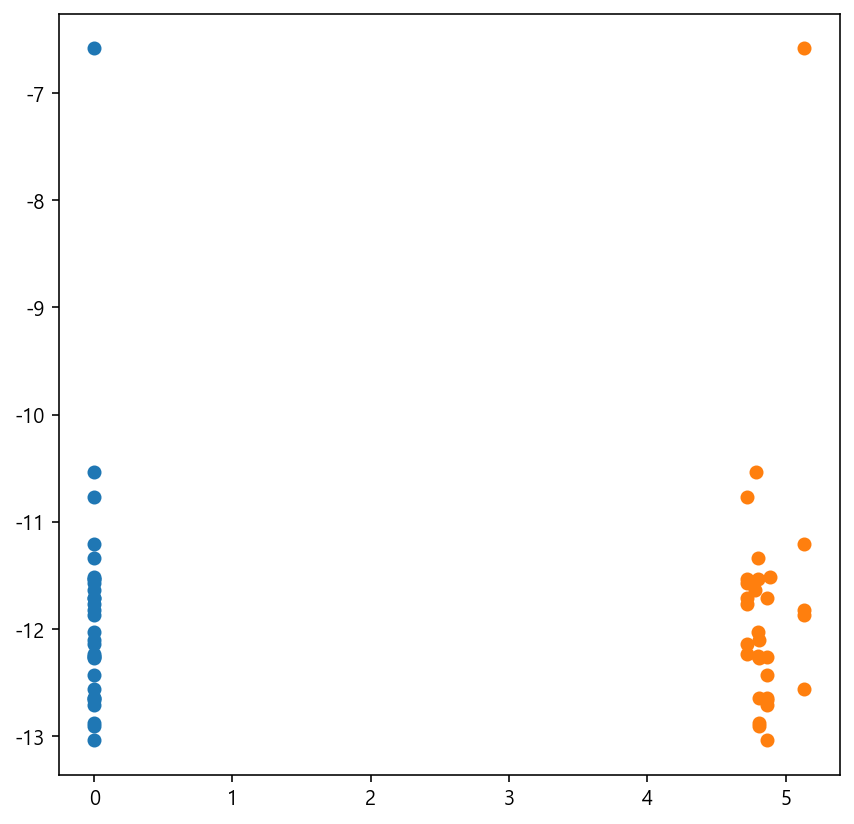

In [68]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(log_x, log_y, 'o')
plt.show()

종속변수를 침수면적비율로 산정하였는데, 비율에 log 변환을 하였기 때문에 음의 값이 출력된 것임</p>
종속변수가 음의변수를 띄는 것을 확인하였을 때,
독립변수와 종속변수 간에 양의 상관관계를 보임을 알 수 있음</p>
-> 강우량이 침수피해에 영향을 미침